#### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?



In [1]:
import numpy as np

In [2]:
x = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
     [-0.18757272, 1.30337355, 5.12093014, 3.46363202],
     [-0.81094525, 1.82463398, 5.79686488, 1.86159445],
     [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
     [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], 
     [-0.62972637, 0.77750764, 2.84124027, 4.54410559], 
     [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
     [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], 
     [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], 
     [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

x = np.array(x)

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

y = np.array(y)

__Метод наименьших квадратов__ заключается в минимизации расстояния между векторами $Y$ и $X \cdot b$:
$$\| Y - X \cdot b \| \rightarrow \min_b$$
При этом вводится дополнительное условие на среднюю ошибку:
$$\overline{E} = 0,$$
где $E = Y - X \cdot b$. Решение такой оптимизационной задачи даёт __коэффициенты линейной регрессии__:
$$b = (X^\top X)^{-1} X^\top Y$$


In [3]:
x.shape

(10, 4)

In [4]:
from itertools import combinations

In [9]:
for i, j in combinations (range(x.shape[1]), 2):
    ones = np.ones((x[:,[i,j]].shape[0], 1)) # Матрица из двух признаков скомбиинированных с помощью combinations.
    x1 = np.hstack((ones, x[:, [i,j]])) #Добавляем единицу в начале матрицы (фиктивный фактор).
    xTx = x1.T.dot(x1) # Матрица xTx
    np.linalg.det(xTx) # Определитель матрицы
    xTx_inv = np.linalg.inv(xTx) 
    b = xTx_inv.dot(x1.T).dot(y) # Коэффициент модели b
    e = y - x1.dot(b)   # Вычисляем среднюю ошибку по формуле
    r2 = 1 - e.var()/y.var() # Коэффициент детерминации
    print(f'{i} {j} {r2}')

0 1 0.18113594742585182
0 2 0.7634246238793151
0 3 0.4532966783144079
1 2 0.5479482734039011
1 3 0.6062055761129932
2 3 0.6224419876505323


Чем ближе коэффициент детерминации к единице, тем модель лучше. Значит, лучшая пара признаков - первый и третий (0 2 в таблице, r2 = 0.763424)

__Статистический анализ__

F-тест Фишера:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

In [10]:
m = 2 # Проверяем два признака
n = x.shape[0]
k1 = m
k2 = n-m-1

F = (0.7634246238793151/k1)/((1-0.7634246238793151)/k2)
F

11.294439122922642

Вычисляем квантиль и критическую область. Возьмем alpha = 0.05

In [11]:
from scipy import stats

In [12]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Итак, критическая область:
$$\Omega_\alpha = \left( 4.7374, \infty \right)$$
F = 11.294439
Значение статистки попало в критическую область, значит нулевая гипотеза отвергается (что теоретический коэффициент детерминации равен  0), следовательно линейная регрессия с факторами 1 и 3 статистически значима.

#### Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [26]:
a = np.ones(77) # значение 1 - совершенные покупки на странице А
b = np.zeros(2432) #2509-77 - просмотры без покупок на странице А (значение 0).
y1 = np.hstack((a,b)) # выборка страницы А
print(y1, y1.shape) 

[1. 1. 1. ... 0. 0. 0.] (2509,)


In [28]:
a = np.ones(60) # значение 1 - совершенные покупки на странице B
b = np.zeros(1405) #1405-60 просмотры без покупок на странице А (значение 0).
y2 = np.hstack((a,b)) # выборка страницы B
print(y2, y2.shape)

[1. 1. 1. ... 0. 0. 0.] (1465,)


In [29]:
y = np.hstack((y1, y2)) # Общая выборка всех просмотров (с покупками и без)
print(y, y.shape)

[1. 1. 1. ... 0. 0. 0.] (3974,)


#### Дисперсионный анализ 
Нулевая гипотеза $H_0$ утверждает, что средние по всем этим выборкам равны:
$$H_0: \:\: \overline{Y_1} = \dots = \overline{Y_k}$$

Другими словами, нулевая гипотеза заключается в том, что фактор $x$ никак не влияет на значения переменной $y$.
Пусть в каждой выборке  𝑌𝑖  содержится  𝑛𝑖  элементов. Обозначим через  𝑌  объединение всех выборок, т.е. выборку размера  𝑛=𝑛1+⋯+𝑛𝑘 .

In [31]:
#Объем выборки
n1 = y1.shape[0]
n2 = y2.shape[0]
n = n1+n2
n1, n2, n

(2509, 1465, 3974)

Рассмотрим две суммы квадратов:
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$
где $y_{ij}$ — $j$-й элемент $i$-й выборки.



In [33]:
# Выборочное средние по каждой группе
y1_mean = y1.mean() 
y2_mean = y2.mean()

y_mean = y.mean() # Выборочне среднее всех групп
y1_mean, y2_mean, y_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

In [34]:
SS_b =  n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2
SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

In [35]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

Итак, статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

In [36]:
F = sigma2_b / sigma2_w
F

2.9293243889013496

Распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$. Критическая область правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$

In [37]:
#Зафиксируем уровень значимости  alpha=0.05 . Для него найдём нужный нам квантиль
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

Значение статистики не попало в критическую область, значит заключаем, что отличие конверсий не являются статистически значимым показателем.

#### Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

In [131]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])    
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])   

x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [132]:
def parametrs_func (x, y) -> float:
    print (f'Выборочное среднее: {np.mean(x)}, {np.mean(y)}')
    print (f'Дисперсия: {np.var(x)}, {np.var(y)}')
    print (f'Коэфициент корреляции Пирсона: {np.corrcoef(x,y)[0,1]}')
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    b0 = y.mean() - b1 * x.mean()
    print (f'Уравнение линейной регрессии: y = {round(b0, 3)} + {round(b1, 3)}*x')
    print ('-'*50)

In [133]:
parametrs_func(x1,y1)
parametrs_func(x2,y2)
parametrs_func(x3,y3)
parametrs_func(x4,y4)

Выборочное среднее: 9.0, 7.500909090909093
Дисперсия: 10.0, 3.7520628099173554
Коэфициент корреляции Пирсона: 0.81642051634484
Уравнение линейной регрессии: y = 3.0 + 0.5*x
--------------------------------------------------
Выборочное среднее: 9.0, 7.50090909090909
Дисперсия: 10.0, 3.752390082644628
Коэфициент корреляции Пирсона: 0.8162365060002427
Уравнение линейной регрессии: y = 3.001 + 0.5*x
--------------------------------------------------
Выборочное среднее: 9.0, 7.5
Дисперсия: 10.0, 3.747836363636364
Коэфициент корреляции Пирсона: 0.8162867394895982
Уравнение линейной регрессии: y = 3.002 + 0.5*x
--------------------------------------------------
Выборочное среднее: 9.0, 7.500909090909091
Дисперсия: 10.0, 3.7484082644628103
Коэфициент корреляции Пирсона: 0.8165214368885031
Уравнение линейной регрессии: y = 3.002 + 0.5*x
--------------------------------------------------


In [134]:
def lreg (x,y):
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    b0 = y.mean() - b1 * x.mean()
    #ox = x
    oy = b0 + b1*x
    return oy

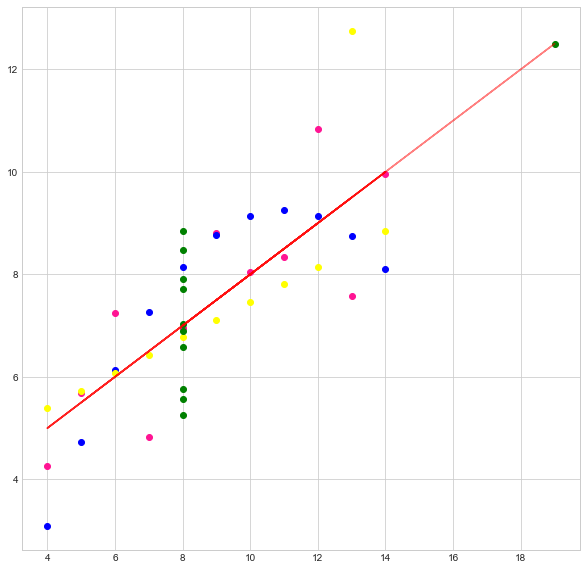

In [135]:
fig, ax = plt.subplots()

ax.scatter(x1, y1, c = 'deeppink')  
plt.plot(x1, lreg(x1, y1), color='red', alpha=0.5)

ax.scatter(x2, y2, c = 'blue')
plt.plot(x2, lreg(x2,y2), color='red', alpha=0.5)

ax.scatter(x3, y3, c = 'yellow')
plt.plot(x3, lreg(x3, y3), color='red', alpha=0.5)

ax.scatter(x4, y4, c = 'green')
plt.plot(x4, lreg(x4, y4), color='red', alpha=0.5)

fig.set_figwidth(10)     
fig.set_figheight(10)    
plt.show()

In [136]:
data = { "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
        "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
        "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
        "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
        "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
        "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
        }

In [137]:
plt.style.use('seaborn-whitegrid')

Выборки 1: b0 = 3.0, 	 b1 = 0.5
Выборки 2: b0 = 3.001, 	 b1 = 0.5
Выборки 3: b0 = 3.002, 	 b1 = 0.5
Выборки 4: b0 = 3.002, 	 b1 = 0.5


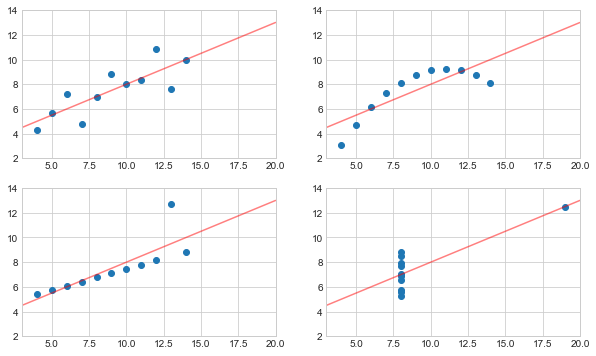

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,6)
ox = np.linspace(3, 20, 10**4)
for i, ax in enumerate(axes.flatten()):
    i += 1
    
    x = data[f'x{i}']
    y = data[f'y{i}']
    
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    b0 = np.mean(y) - b1 * np.mean(x)
    
    print (f'Выборки {i}: b0 = {round(b0, 3)}, \t b1 = {round(b1, 3)}')
    
    oy = b0 + b1*ox
    
    ax.scatter(x,y)
    ax.plot(ox, oy, c = 'red', alpha = 0.5)
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)   
    